In [1]:
%matplotlib inline

from fermi_model import * 

states10 = csv_to_states_from_filename('states10.csv')

In [57]:
adj = Fermi.get_adj_matrix(states10)

In [58]:
# adj += adj.T
adj = adj.T

In [2]:
# plt.figure(figsize=(10, 10))
# plt.pcolormesh(adj, cmap="copper")
# plt.title(r"$S_{ij}$ (iからjへの遷移)", fontsize=20)
# plt.xlabel('j', fontsize=20)
# plt.ylabel('i', fontsize=20)
# plt.ylim(adj.shape[0] - 1, 0)
# plt.show()

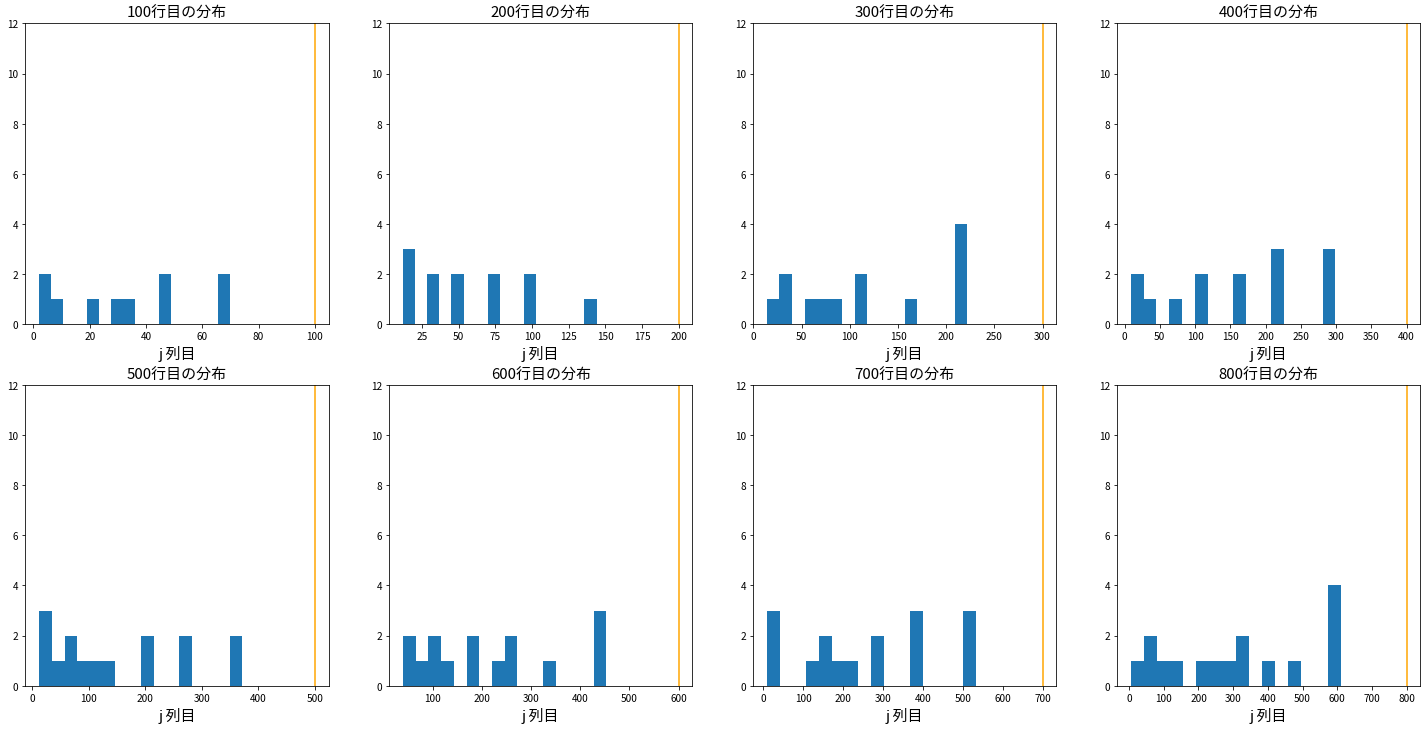

In [61]:

bin_num = 16

fig = plt.figure(figsize=(25, 8))
fig.subplots_adjust(left=0.125,
right=0.9,
bottom=0.05,
top=1.2,
wspace=0.2,
hspace=0.2)
range_size = 8
for i in range(0, range_size):
    row = (i+1) * 100
    ax = fig.add_subplot(2, 4, i+1)
    ax.hist(np.where(adj[row] == 1), bins=bin_num)
    ax.set_title(f"{row}行目の分布", fontsize=15)
    ax.set_xlabel("j 列目", fontsize=15)
    ylim = 12
    ax.set_ylim(0, ylim)
    ax.vlines(x=row, ymin=0, ymax=ylim, color="orange")
plt.show()


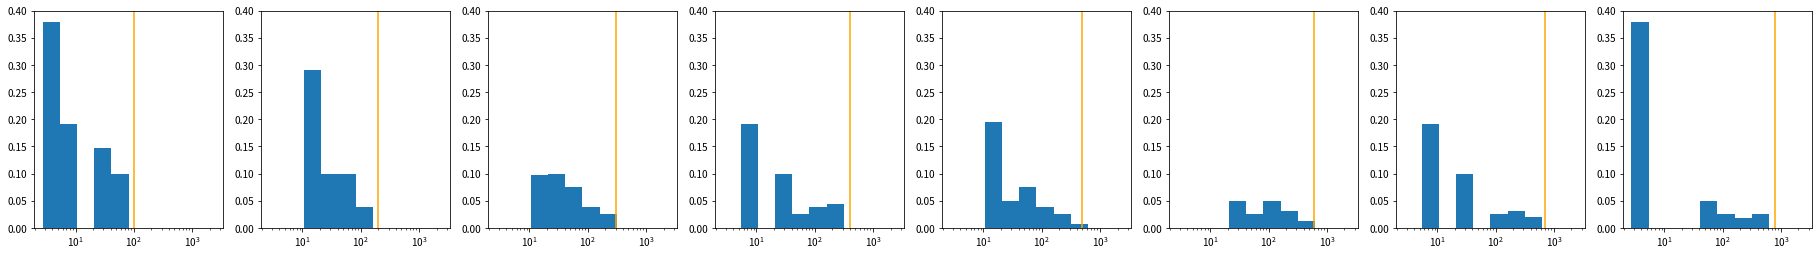

In [62]:

fig = plt.figure(figsize=(40, 4))
for i in range(0, 8):
    row = (i+1) * 100
    bins = np.logspace(start=1, stop=np.log(adj.shape[0]), num=11, base=np.e)
    hist = np.histogram(np.where(adj[row] == 1), bins=bins)[0] / np.diff(bins) # 密度としてSを考えている
    # hist = np.histogram(np.where(adj[row] == 1), bins=bins)[0]
    ax = fig.add_subplot(1, 10, i+1)
    ax.bar(bins[:-1], hist, width=np.diff(bins), align="edge")
    ax.set_xscale("log")
    
    ax.set_ylim(0, 0.4)
    ax.vlines(x=row, ymin=0, ymax=0.4, color="orange")
plt.show()


In [9]:
hist

array([0.37808059, 0.        , 0.        , 0.        , 0.04989875,
       0.02529056, 0.01922731, 0.025987  , 0.00823199, 0.01251685])

In [3]:
# dct = {状態のidx: {遷移先が3εのルート数: 1個, 遷移先が2εのルート数: 5個}}
def calc_state2dct(states, kind: str='both'):
    if not kind in ['deexcitation', 'excitation', 'both']:
        raise Exception('引数kindは "excitation", "deexcitation", "both" のいずれか')
    num_states = len(states)
    dct = dict()
    if kind == 'deexcitation':
        for i in range(1, num_states):
            dct[i] = dict()
            for j in range(0, i):
                if Fermi.is_connected(states[i], states[j]):
                    energy = states[j].score
                    if dct[i].get(energy):
                        dct[i][energy] += 1
                    else:
                        dct[i][energy] = 1
    elif kind == 'excitation':
        for i in range(0, num_states):
            dct[i] = dict()
            for j in range(i+1, num_states):
                if Fermi.is_connected(states[i], states[j]):
                    energy = states[j].score
                    if dct[i].get(energy):
                        dct[i][energy] += 1
                    else:
                        dct[i][energy] = 1
    else:
        for i in range(num_states):
            dct[i] = dict()
            for j in range(num_states):
                if Fermi.is_connected(states[i], states[j]):
                    energy = states[j].score
                    if dct[i].get(energy):
                        dct[i][energy] += 1
                    else:
                        dct[i][energy] = 1
    return dct

# dct = {励起エネルギー: {遷移先が3εのルート数: 1個, ...}}
def calc_score2dct(states, kind: str='both'):
    if not kind in ['deexcitation', 'excitation', 'both']:
        raise Exception('引数kindは "excitation", "deexcitation", "both" のいずれか')
    num_states = len(states)
    dct = dict()
    if kind == 'deexcitation':
        for i in range(1, num_states):
            for j in range(0, i):
                if Fermi.is_connected(states[i], states[j]):
                    now_score = states[i].score
                    post_score = states[j].score
                    if not dct.get(now_score):
                        dct[now_score] = {}
                    if dct[now_score].get(post_score):
                        dct[now_score][post_score] += 1
                    else:
                        dct[now_score][post_score] = 1
    elif kind == 'excitation':
        for i in range(0, num_states):
            for j in range(i+1, num_states):
                if Fermi.is_connected(states[i], states[j]):
                    now_score = states[i].score
                    post_score = states[j].score
                    if not dct.get(now_score):
                        dct[now_score] = {}
                    if dct[now_score].get(post_score):
                        dct[now_score][post_score] += 1
                    else:
                        dct[now_score][post_score] = 1
    else:
        for i in range(num_states):
            for j in range(num_states):
                if Fermi.is_connected(states[i], states[j]):
                    now_score = states[i].score
                    post_score = states[j].score
                    if not dct.get(now_score):
                        dct[now_score] = {}
                    if dct[now_score].get(post_score):
                        dct[now_score][post_score] += 1
                    else:
                        dct[now_score][post_score] = 1
    return dct

In [4]:
state2dct_de = calc_state2dct(states10, kind='deexcitation')
state2dct_ex = calc_state2dct(states10, kind='excitation')

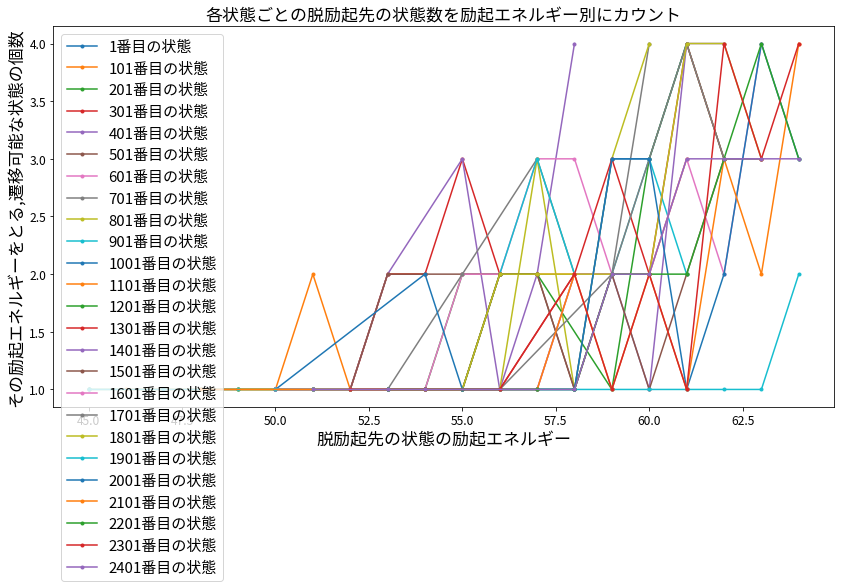

In [10]:
plt.figure(figsize=(14, 7))
for row in range(1, len(states10), 100):
    score2num = state2dct_de[row] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    nums = np.fromiter(score2num.values(), dtype=int)
    plt.plot(scores, nums, '.-', label=f"{row}番目の状態")
plt.legend(fontsize=15)
plt.title("各状態ごとの脱励起先の状態数を励起エネルギー別にカウント", fontsize=17)
plt.xlabel("脱励起先の状態の励起エネルギー", fontsize=17)
plt.ylabel("その励起エネルギーをとる,遷移可能な状態の個数", fontsize=17)
plt.show()

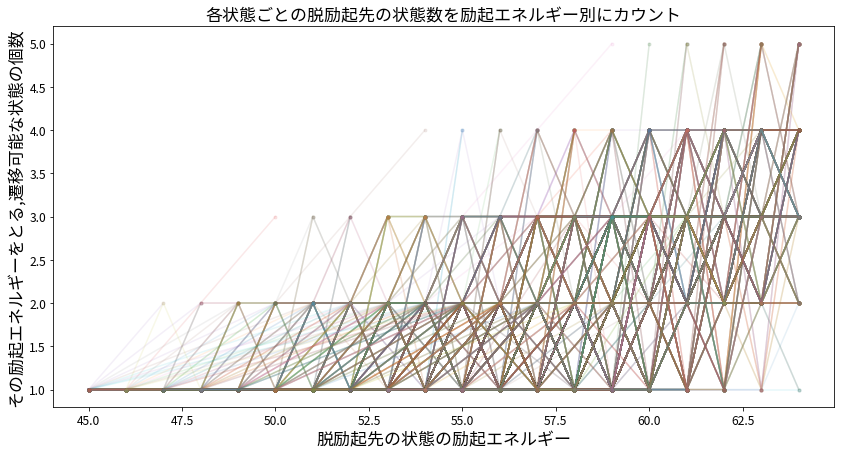

In [11]:
plt.figure(figsize=(14, 7))
for row in range(1, len(states10)):
    score2num = state2dct_de[row] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    nums = np.fromiter(score2num.values(), dtype=int)
    plt.plot(scores, nums, '.-', alpha=0.1)
plt.title("各状態ごとの脱励起先の状態数を励起エネルギー別にカウント", fontsize=17)
plt.xlabel("脱励起先の状態の励起エネルギー", fontsize=17)
plt.ylabel("その励起エネルギーをとる,遷移可能な状態の個数", fontsize=17)
plt.show()

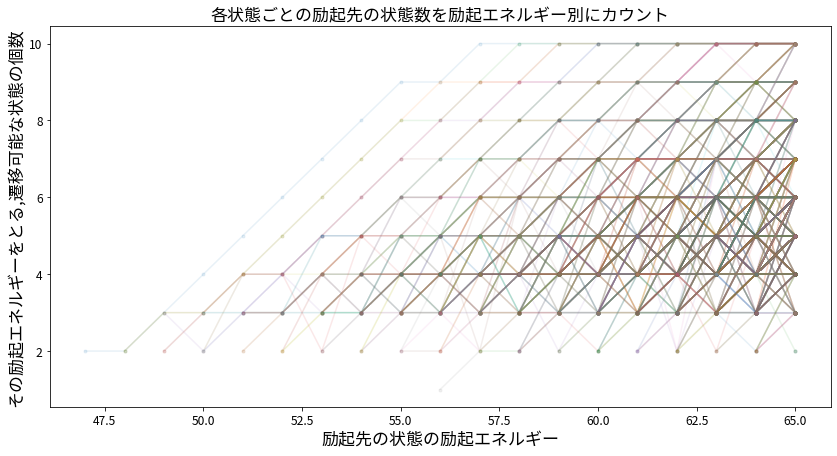

In [12]:
plt.figure(figsize=(14, 7))
for row in range(1, len(states10)):
    score2num = state2dct_ex[row] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    nums = np.fromiter(score2num.values(), dtype=int)
    plt.plot(scores, nums, '.-', alpha=0.1)
plt.title("各状態ごとの励起先の状態数を励起エネルギー別にカウント", fontsize=17)
plt.xlabel("励起先の状態の励起エネルギー", fontsize=17)
plt.ylabel("その励起エネルギーをとる,遷移可能な状態の個数", fontsize=17)
plt.show()

In [5]:
def calc_degeneracies(states: list[State]):
    """実際の縮退度を計算"""
    dct = {}
    for state in states:
        if dct.get(state.score):
            dct[state.score] += 1
        else:
            dct[state.score] = 1
    degeneracies = np.fromiter(dct.values(), dtype=int)
    return degeneracies

In [6]:
degeneracies10 = calc_degeneracies(states10)

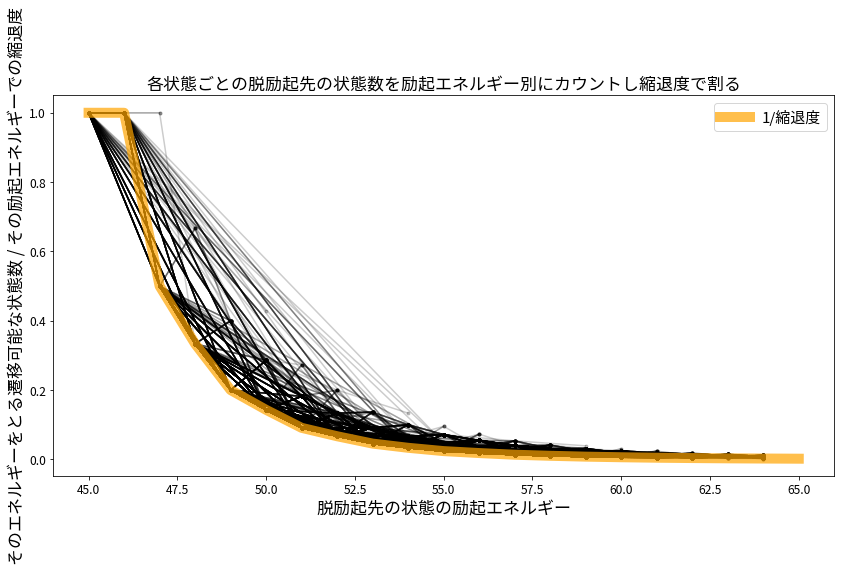

In [8]:
# 脱励起のみを考える
scores10 = Fermi.get_scores(states10)
plt.figure(figsize=(14, 7))
# for row in range(0, len(states10), 20):
for row in range(1, len(states10)):
    score2num = state2dct_de[row] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    not_duplicated_scores = [score for score in scores10 if score not in scores]
    nums = np.fromiter(score2num.values(), dtype=int)
    rates = nums / [degeneracy for degeneracy, score in zip(degeneracies10, scores10) if score not in not_duplicated_scores]
    # plt.plot(scores, rates, '.-', label=f"{row}番目の状態", alpha=0.2, color="black")
    plt.plot(scores, rates, '.-', alpha=0.2, color="black")
plt.plot(scores10, 1 / degeneracies10, '-', linewidth=10, alpha=0.7, color="orange", label="1/縮退度")
plt.legend(fontsize=15)
plt.title("各状態ごとの脱励起先の状態数を励起エネルギー別にカウントし縮退度で割る", fontsize=17)
plt.xlabel("脱励起先の状態の励起エネルギー", fontsize=17)
plt.ylabel("そのエネルギーをとる遷移可能な状態数 / その励起エネルギーでの縮退度", fontsize=17)
plt.show()

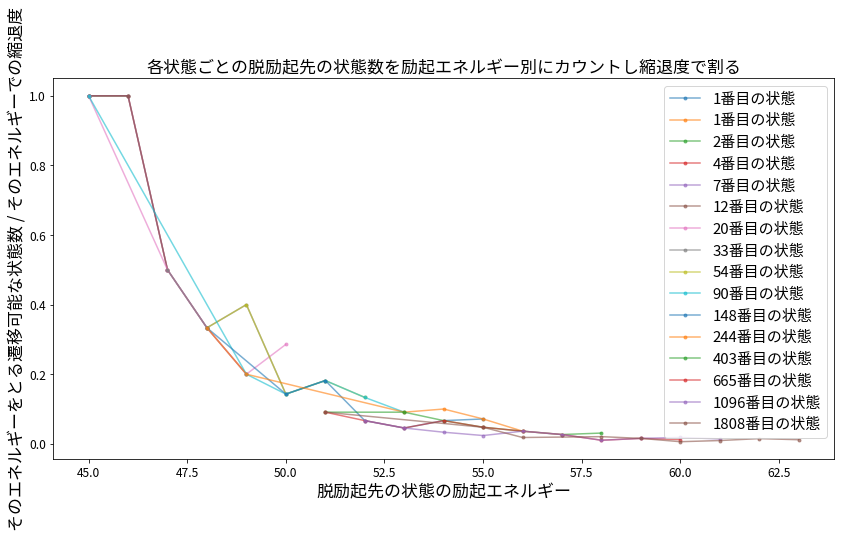

In [9]:
# 脱励起のみを考える
scores10 = Fermi.get_scores(states10)
plt.figure(figsize=(14, 7))
# for row in range(0, len(states10), 20):
# for row in range(1, len(states10)):
for row in map(int, np.exp(np.arange(0, np.log(len(states10)), step=0.5))):
    score2num = state2dct_de[row] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    not_duplicated_scores = [score for score in scores10 if score not in scores]
    nums = np.fromiter(score2num.values(), dtype=int)
    rates = nums / [degeneracy for degeneracy, score in zip(degeneracies10, scores10) if score not in not_duplicated_scores]
    plt.plot(scores, rates, '.-', label=f"{row}番目の状態", alpha=0.6)
    # plt.plot(scores, rates, '.-', alpha=0.2, color="black")
# plt.plot(scores10, 1 / degeneracies10, '-', linewidth=10, alpha=0.7, color="orange", label="1/縮退度")
plt.legend(fontsize=15)
plt.title("各状態ごとの脱励起先の状態数を励起エネルギー別にカウントし縮退度で割る", fontsize=17)
plt.xlabel("脱励起先の状態の励起エネルギー", fontsize=17)
plt.ylabel("そのエネルギーをとる遷移可能な状態数 / そのエネルギーでの縮退度", fontsize=17)
plt.show()

In [29]:
state2dct_ex = calc_state2dct(states10, kind='excitation')

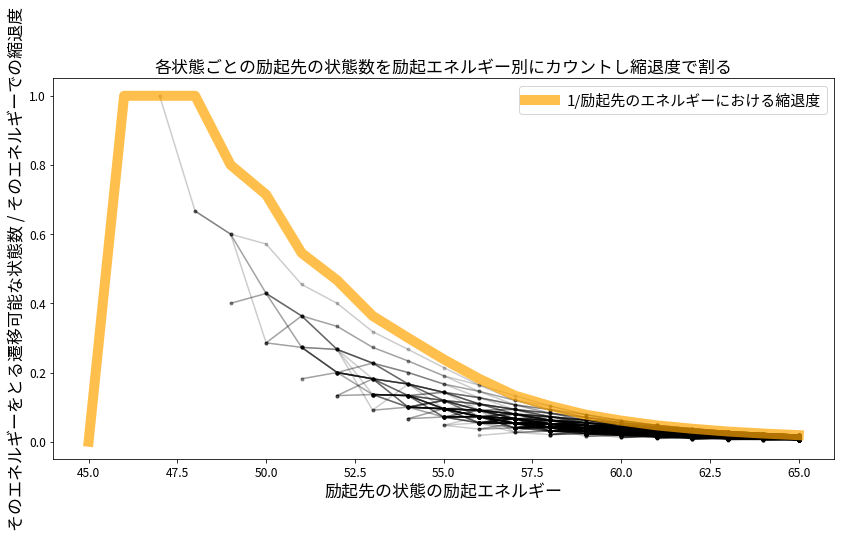

In [14]:
# 励起のみを考える
scores10 = Fermi.get_scores(states10)
plt.figure(figsize=(14, 7))
for row in range(1, len(states10)):
    score2num = state2dct_ex[row] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    not_duplicated_scores = [score for score in scores10 if score not in scores]
    nums = np.fromiter(score2num.values(), dtype=int)
    rates = nums / [degeneracy for degeneracy, score in zip(degeneracies10, scores10) if score not in not_duplicated_scores]
    # plt.plot(scores, rates, '.-', label=f"{row}番目の状態", alpha=0.2, color="black")
    plt.plot(scores, rates, '.-', alpha=0.2, color="black")
# plt.plot(np.array(scores10) + 2, 1 / degeneracies10, '-', linewidth=10, alpha=0.7, color="orange", label="1/縮退度") # ρ(E-2)dE
# plt.plot(np.array(scores10), 1 / degeneracies10, '-', linewidth=10, alpha=0.7, color="orange", label="1/励起先のエネルギーにおける縮退度")
# plt.plot(np.array(scores10), np.array([min(10, E - 10 * 9 / 2) for E in scores10]) / 2 / degeneracies10, '-', linewidth=10, alpha=0.7, color="orange", label="1/励起先のエネルギーにおける縮退度")
plt.plot(np.array(scores10), np.array([min(10, E - 10 * 9 / 2) for E in scores10])  / degeneracies10, '-', linewidth=10, alpha=0.7, color="orange", label="1/励起先のエネルギーにおける縮退度")
plt.legend(fontsize=15)
plt.title("各状態ごとの励起先の状態数を励起エネルギー別にカウントし縮退度で割る", fontsize=17)
plt.xlabel("励起先の状態の励起エネルギー", fontsize=17)
plt.ylabel("そのエネルギーをとる遷移可能な状態数 / そのエネルギーでの縮退度", fontsize=17)
plt.show()

* 基底状態から、その次の準位には遷移できない。

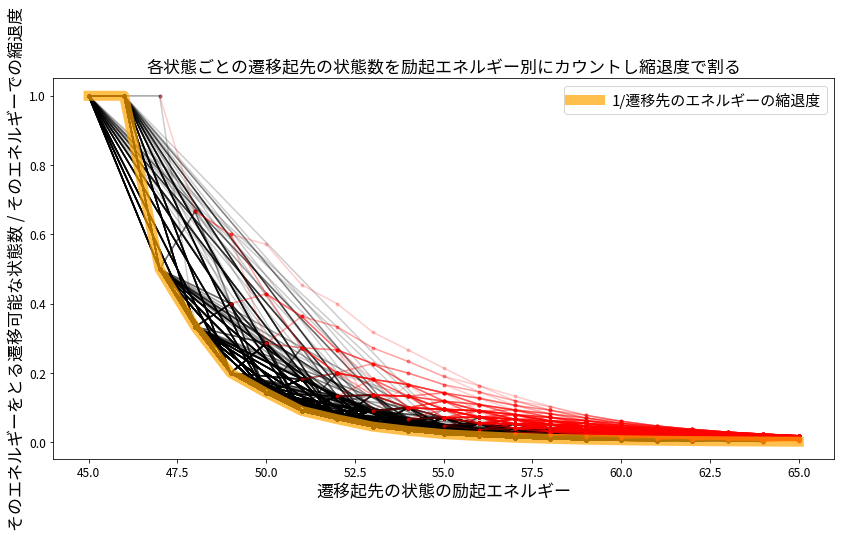

In [15]:
scores10 = Fermi.get_scores(states10)
plt.figure(figsize=(14, 7))
# for row in range(0, len(states10), 20):
for row in range(1, len(states10)):
    score2num = state2dct_de[row] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    not_duplicated_scores = [score for score in scores10 if score not in scores]
    nums = np.fromiter(score2num.values(), dtype=int)
    rates = nums / [degeneracy for degeneracy, score in zip(degeneracies10, scores10) if score not in not_duplicated_scores]
    # plt.plot(scores, rates, '.-', label=f"{row}番目の状態", alpha=0.2, color="black")
    plt.plot(scores, rates, '.-', alpha=0.2, color="black")

for row in range(1, len(states10)):
    score2num = state2dct_ex[row] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    not_duplicated_scores = [score for score in scores10 if score not in scores]
    nums = np.fromiter(score2num.values(), dtype=int)
    rates = nums / [degeneracy for degeneracy, score in zip(degeneracies10, scores10) if score not in not_duplicated_scores]
    # plt.plot(scores, rates, '.-', label=f"{row}番目の状態", alpha=0.2, color="black")
    plt.plot(scores, rates, '.-', alpha=0.2, color="red")
plt.plot(scores10, 1 / degeneracies10, '-', linewidth=10, alpha=0.7, color="orange", label="1/遷移先のエネルギーの縮退度")
plt.legend(fontsize=15)
plt.title("各状態ごとの遷移起先の状態数を励起エネルギー別にカウントし縮退度で割る", fontsize=17)
plt.xlabel("遷移起先の状態の励起エネルギー", fontsize=17)
plt.ylabel("そのエネルギーをとる遷移可能な状態数 / そのエネルギーでの縮退度", fontsize=17)
plt.show()

## 遷移前も状態ではなく励起エネルギーごとに見る

In [16]:
def calc_degeneracy_dct(states):
    """実際の縮退度を計算"""
    dct = {}
    for state in states:
        if dct.get(state.score):
            dct[state.score] += 1
        else:
            dct[state.score] = 1
    return dct

In [17]:
degeneracy_dct = calc_degeneracy_dct(states10)

In [18]:
score2dct_de = calc_score2dct(states10, kind='deexcitation')
score2dct_ex = calc_score2dct(states10, kind='excitation')

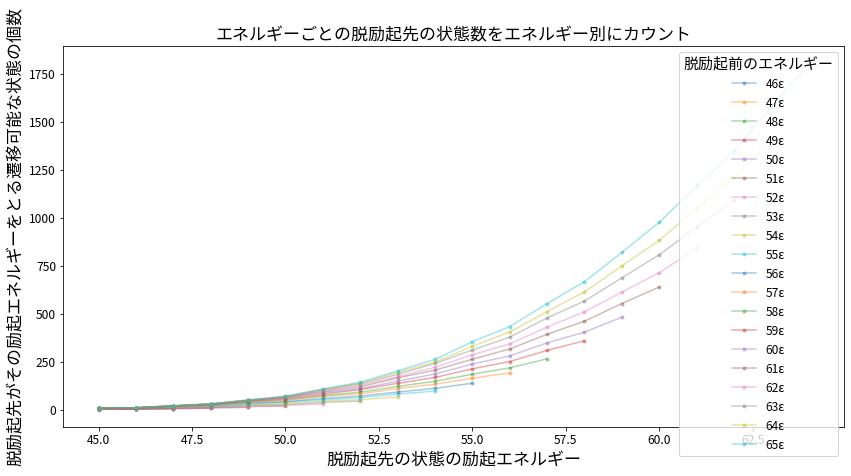

In [19]:
scores10 = Fermi.get_scores(states10)
plt.figure(figsize=(14, 7))
for score in scores10[1:]:
    score2num = score2dct_de[score] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    nums = np.fromiter(score2num.values(), dtype=int)
    degeneracy = degeneracy_dct[score]
    plt.plot(scores, nums, '.-', alpha=0.4, label=f"{score}ε")
plt.legend(title="脱励起前のエネルギー", title_fontsize=15)
plt.title("エネルギーごとの脱励起先の状態数をエネルギー別にカウント", fontsize=17)
plt.xlabel("脱励起先の状態の励起エネルギー", fontsize=17)
plt.ylabel("脱励起先がその励起エネルギーをとる遷移可能な状態の個数", fontsize=17)
plt.show()

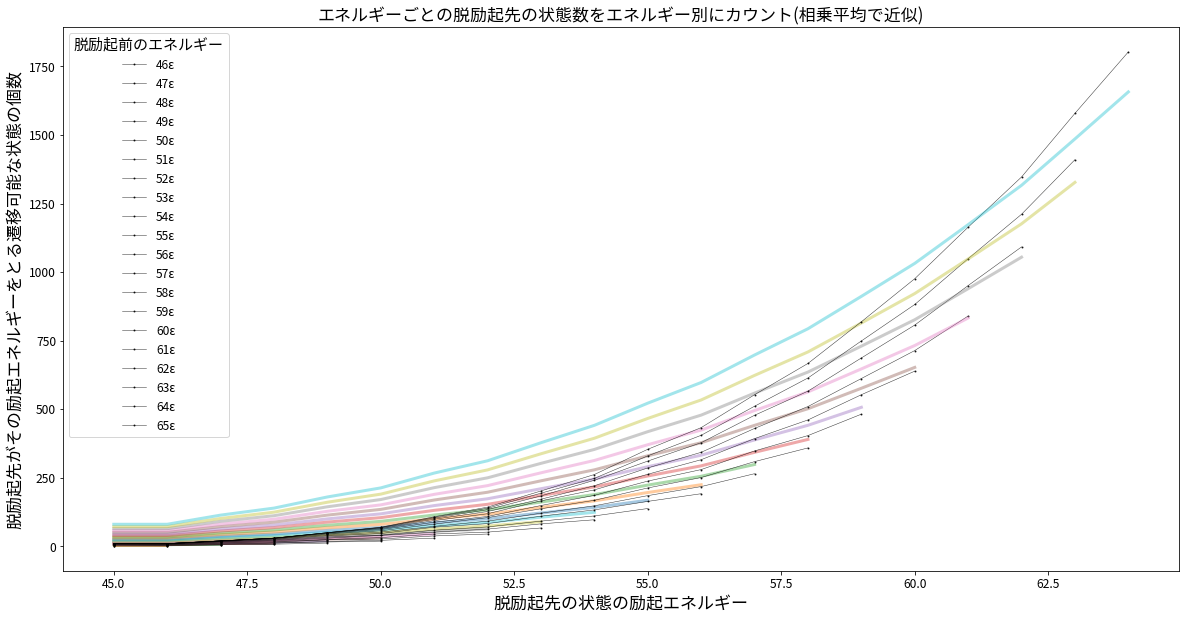

In [119]:
S = 3.5
scores10 = Fermi.get_scores(states10)
plt.figure(figsize=(20, 10))
for score in scores10[1:]:
    score2num = score2dct_de[score] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    nums = np.fromiter(score2num.values(), dtype=int)
    degeneracy = degeneracy_dct[score]
    # plt.plot(scores, nums, '.-', alpha=0.5, label=f"{score}ε")
    plt.plot(scores, nums, '.-', alpha=0.8, linewidth=0.5, ms=2, label=f"{score}ε", color="black")
    # plt.plot(scores, degeneracy * degeneracies10[:score-min(scores10)] * S, '-', alpha=0.2, linewidth=5)
    plt.plot(scores, S * (degeneracy * degeneracies10[:score-min(scores10)])**0.5, '-', alpha=0.4, linewidth=3) #
plt.legend(title="脱励起前のエネルギー", title_fontsize=15)
plt.title("エネルギーごとの脱励起先の状態数をエネルギー別にカウント(相乗平均で近似)", fontsize=17)
plt.xlabel("脱励起先の状態の励起エネルギー", fontsize=17)
plt.ylabel("脱励起先がその励起エネルギーをとる遷移可能な状態の個数", fontsize=17)
plt.show()

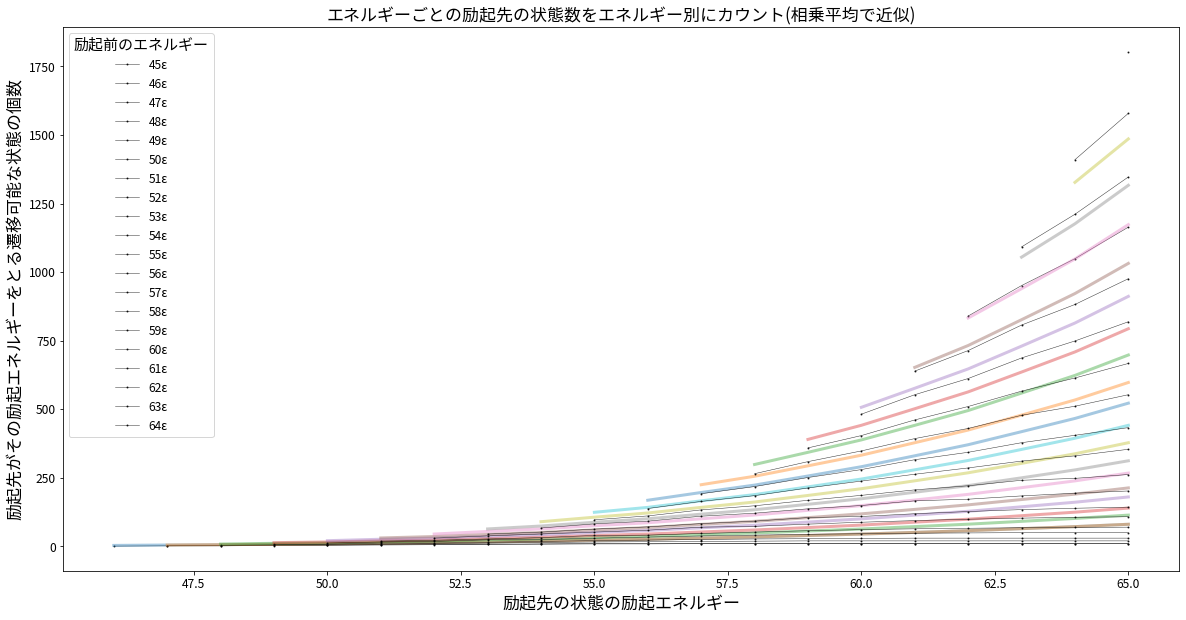

In [121]:
S = 3.5
scores10 = Fermi.get_scores(states10)
plt.figure(figsize=(20, 10))
for score in scores10[:-1]:
    score2num = score2dct_ex[score] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    nums = np.fromiter(score2num.values(), dtype=int)
    degeneracy = degeneracy_dct[score]
    plt.plot(scores, nums, '.-', alpha=0.8, linewidth=0.5, ms=2, label=f"{score}ε", color="black")
    plt.plot(scores, (degeneracy * degeneracies10[score - min(scores10) + 1:])**0.5 * S, '-', alpha=0.4, linewidth=3)
plt.legend(title="励起前のエネルギー", title_fontsize=15)
plt.title("エネルギーごとの励起先の状態数をエネルギー別にカウント(相乗平均で近似)", fontsize=17)
plt.xlabel("励起先の状態の励起エネルギー", fontsize=17)
plt.ylabel("励起先がその励起エネルギーをとる遷移可能な状態の個数", fontsize=17)
plt.show()

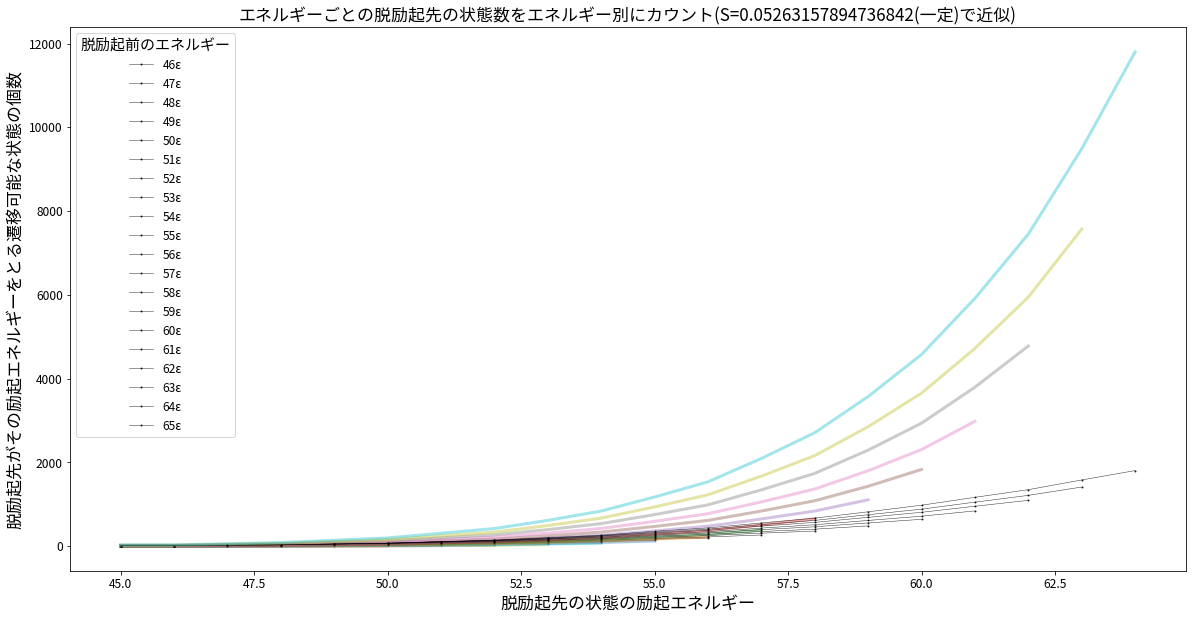

In [20]:
S = 1/19
scores10 = Fermi.get_scores(states10)
plt.figure(figsize=(20, 10))
for score in scores10[1:]:
    score2num = score2dct_de[score] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    nums = np.fromiter(score2num.values(), dtype=int)
    degeneracy = degeneracy_dct[score]
    # plt.plot(scores, nums, '.-', alpha=0.5, label=f"{score}ε")
    plt.plot(scores, nums, '.-', alpha=0.8, linewidth=0.5, ms=2, label=f"{score}ε", color="black")
    plt.plot(scores, degeneracy * degeneracies10[:score-min(scores10)] * S, '-', alpha=0.4, linewidth=3)
plt.legend(title="脱励起前のエネルギー", title_fontsize=15)
plt.title(f"エネルギーごとの脱励起先の状態数をエネルギー別にカウント(S={S}(一定)で近似)", fontsize=17)
plt.xlabel("脱励起先の状態の励起エネルギー", fontsize=17)
plt.ylabel("脱励起先がその励起エネルギーをとる遷移可能な状態の個数", fontsize=17)
plt.show()

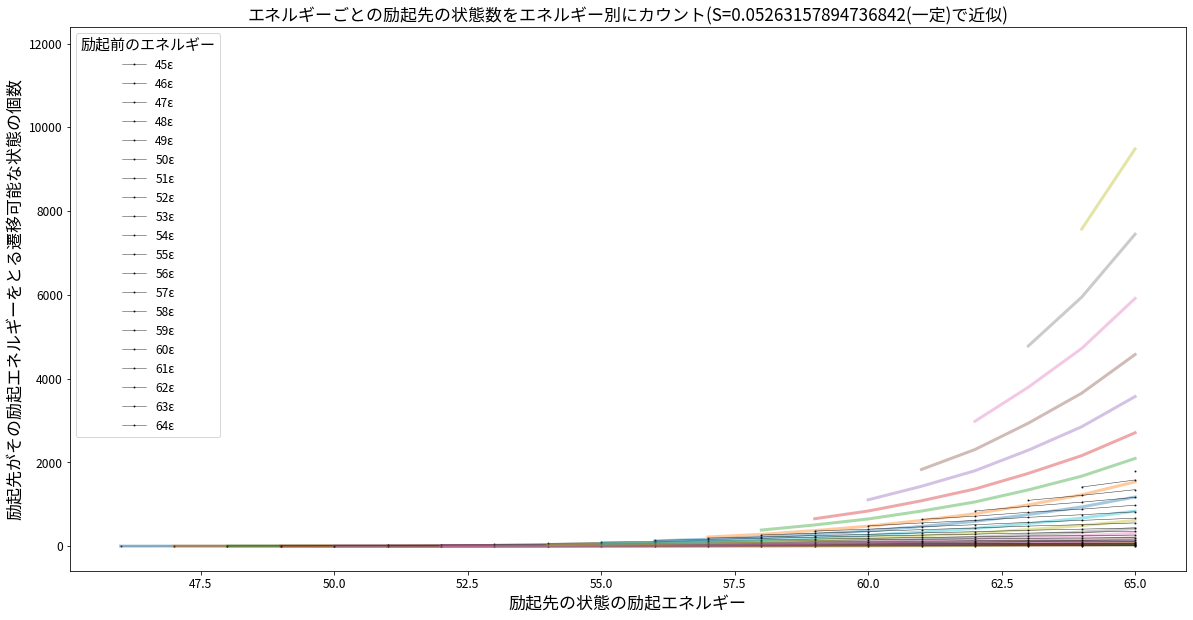

In [21]:
S = 1/19
scores10 = Fermi.get_scores(states10)
plt.figure(figsize=(20, 10))
for score in scores10[:-1]:
    score2num = score2dct_ex[score] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    nums = np.fromiter(score2num.values(), dtype=int)
    degeneracy = degeneracy_dct[score]
    plt.plot(scores, nums, '.-', alpha=0.8, linewidth=0.5, ms=2, label=f"{score}ε", color="black")
    plt.plot(scores, degeneracy * degeneracies10[score - min(scores10) + 1:] * S, '-', alpha=0.4, linewidth=3)
plt.legend(title="励起前のエネルギー", title_fontsize=15)
plt.title(f"エネルギーごとの励起先の状態数をエネルギー別にカウント(S={S}(一定)で近似)", fontsize=17)
plt.xlabel("励起先の状態の励起エネルギー", fontsize=17)
plt.ylabel("励起先がその励起エネルギーをとる遷移可能な状態の個数", fontsize=17)
plt.show()

In [ ]:
score2dct_both = calc_score2dct(states10, kind='both', include)

In [24]:
a = np.arange(0, 5, 0.1)
a

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [25]:
b = np.delete(a, 1)
b, a

(array([0. , 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
        1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
        2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
        4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]))

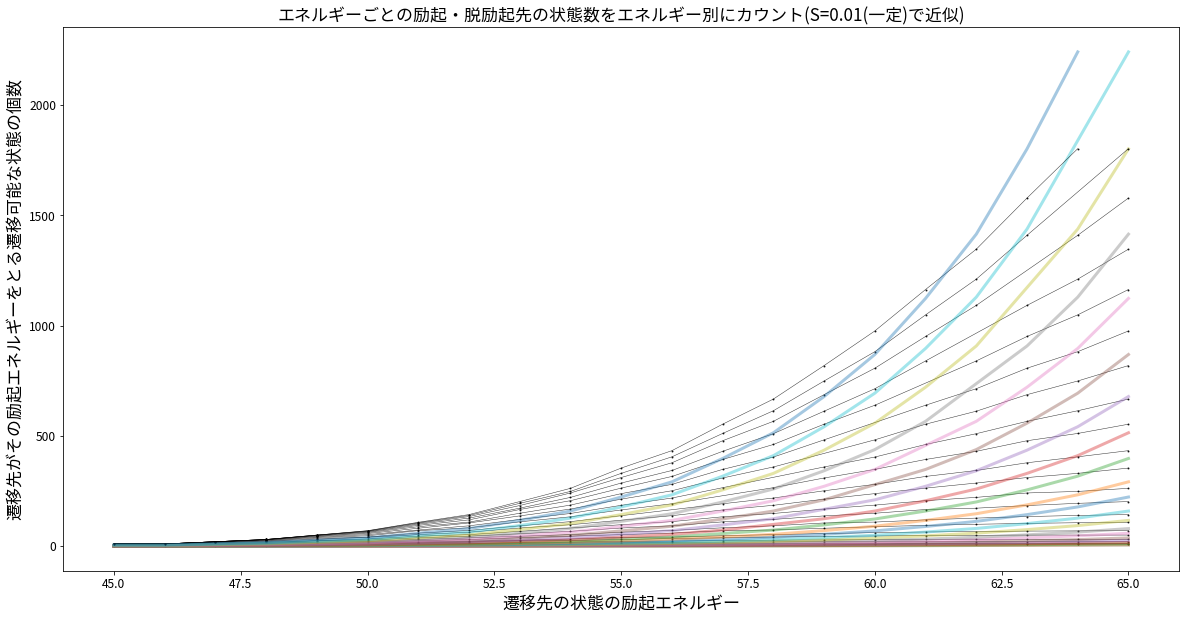

In [32]:
S = 0.01
scores10 = Fermi.get_scores(states10)
min_score = min(scores10)
plt.figure(figsize=(20, 10))
for score in scores10:
    score2num = score2dct_both[score] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    nums = np.fromiter(score2num.values(), dtype=int)
    degeneracy = degeneracy_dct[score]
    plt.plot(scores, nums, '.-', alpha=0.8, linewidth=0.5, ms=2, color="black")
    plt.plot(scores, degeneracy * np.delete(degeneracies10, score - min_score) * S, '-', alpha=0.4, linewidth=3)
plt.title(f"エネルギーごとの励起・脱励起先の状態数をエネルギー別にカウント(S={S}(一定)で近似)", fontsize=17)
plt.xlabel("遷移先の状態の励起エネルギー", fontsize=17)
plt.ylabel("遷移先がその励起エネルギーをとる遷移可能な状態の個数", fontsize=17)
plt.show()

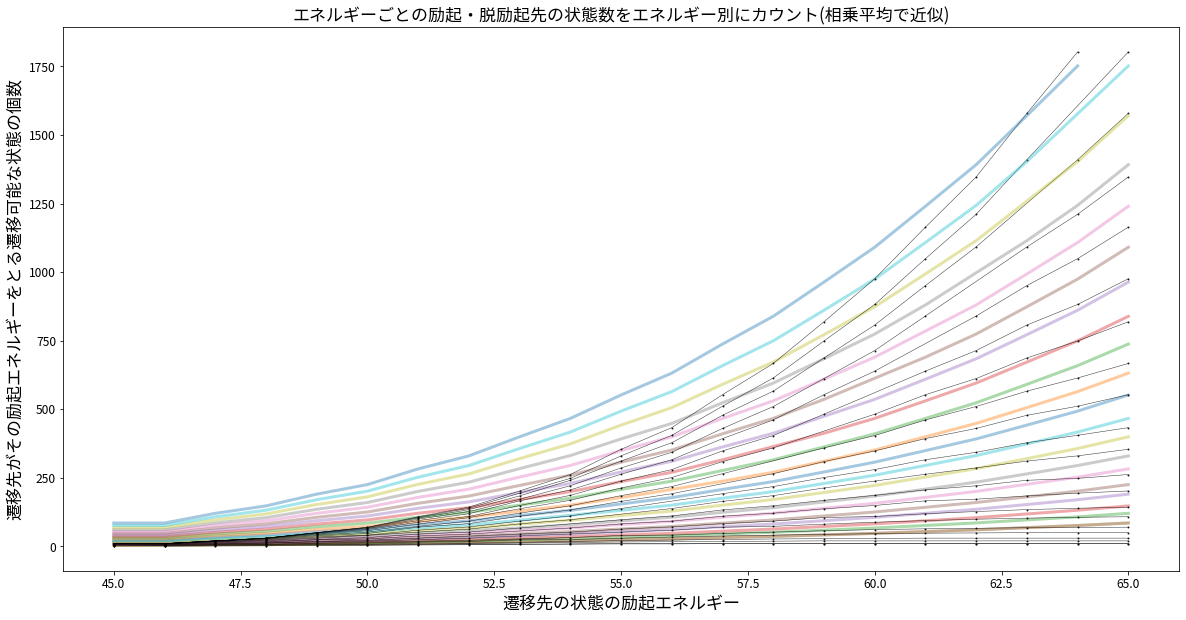

In [36]:
scores10 = Fermi.get_scores(states10)
min_score = min(scores10)
plt.figure(figsize=(20, 10))
for score in scores10:
    score2num = score2dct_both[score] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    nums = np.fromiter(score2num.values(), dtype=int)
    degeneracy = degeneracy_dct[score]
    plt.plot(scores, nums, '.-', alpha=0.8, linewidth=0.5, ms=2, color="black")
    plt.plot(scores, (degeneracy * np.delete(degeneracies10, score - min_score))**0.5 * 3.7, '-', alpha=0.4, linewidth=3)
plt.title(f"エネルギーごとの励起・脱励起先の状態数をエネルギー別にカウント(相乗平均で近似)", fontsize=17)
plt.xlabel("遷移先の状態の励起エネルギー", fontsize=17)
plt.ylabel("遷移先がその励起エネルギーをとる遷移可能な状態の個数", fontsize=17)
plt.show()

縮退度で割るのではなく、全ルート数で割る(遷移前の状態数 × 遷移後の状態数)

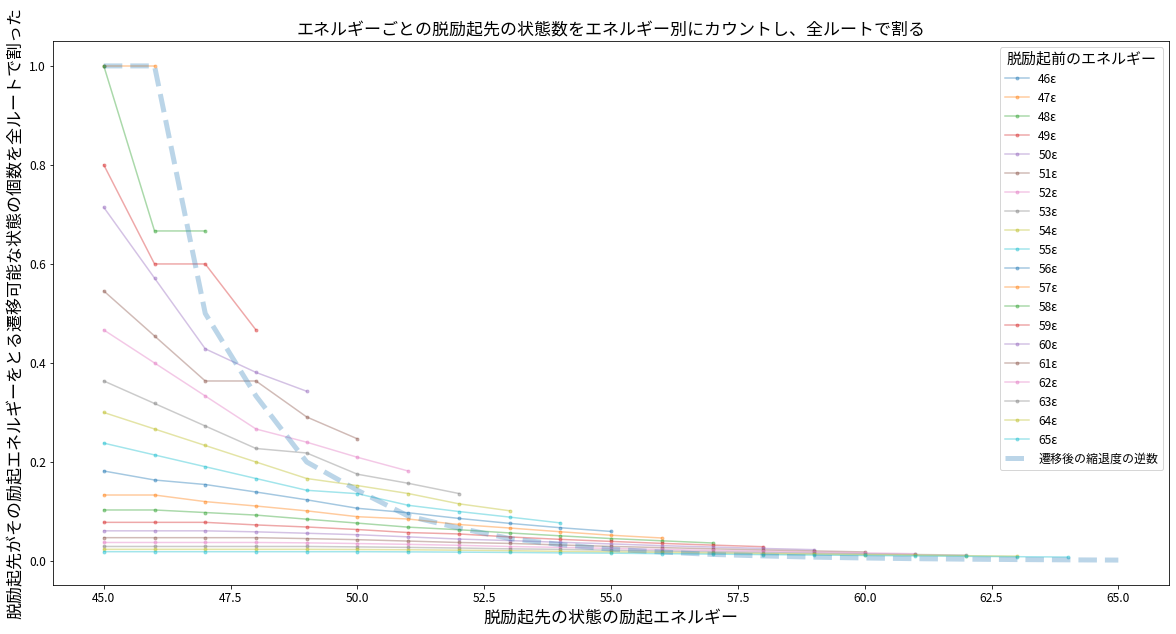

In [54]:
scores10 = Fermi.get_scores(states10)
plt.figure(figsize=(20, 10))
for score in scores10[1:]:
    score2num = score2dct_de[score] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    nums = np.fromiter(score2num.values(), dtype=int)
    degeneracy = degeneracy_dct[score]
    plt.plot(scores, nums / (degeneracy * degeneracies10[:score - min(scores10)]), '.-', alpha=0.4, label=f"{score}ε")
    # plt.plot(scores, nums, '.-', alpha=0.4, label=f"{score}ε")
plt.plot(scores10, 1/degeneracies10, '--', alpha=0.3, linewidth=5, label="遷移後の縮退度の逆数")
plt.legend(title="脱励起前のエネルギー", title_fontsize=15)

plt.title("エネルギーごとの脱励起先の状態数をエネルギー別にカウントし、全ルートで割る", fontsize=17)
plt.xlabel("脱励起先の状態の励起エネルギー", fontsize=17)
plt.ylabel("脱励起先がその励起エネルギーをとる遷移可能な状態の個数を全ルートで割った", fontsize=17)
plt.show()

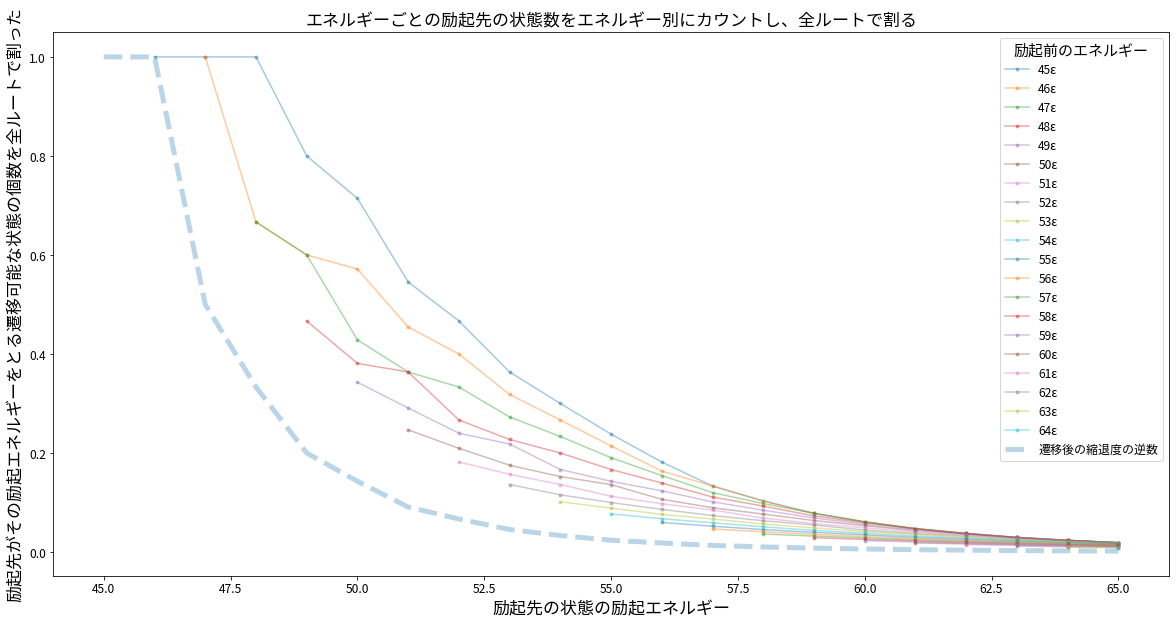

In [55]:
scores10 = Fermi.get_scores(states10)
plt.figure(figsize=(20, 10))
for score in scores10[:-1]:
    score2num = score2dct_ex[score] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    nums = np.fromiter(score2num.values(), dtype=int)
    degeneracy = degeneracy_dct[score]
    plt.plot(scores, nums / (degeneracy * degeneracies10[score - min(scores10) + 1:]), '.-', alpha=0.4, label=f"{score}ε")
plt.plot(scores10, 1/degeneracies10, '--', alpha=0.3, linewidth=5, label="遷移後の縮退度の逆数")
plt.legend(title="励起前のエネルギー", title_fontsize=15)
plt.title("エネルギーごとの励起先の状態数をエネルギー別にカウントし、全ルートで割る", fontsize=17)
plt.xlabel("励起先の状態の励起エネルギー", fontsize=17)
plt.ylabel("励起先がその励起エネルギーをとる遷移可能な状態の個数を全ルートで割った", fontsize=17)
plt.show()

In [47]:
score2dct_de

{46: {45: 1},
 47: {45: 2, 46: 2},
 48: {45: 3, 46: 2, 47: 4},
 49: {45: 4, 46: 3, 47: 6, 48: 7},
 50: {45: 5, 46: 4, 47: 6, 48: 8, 49: 12},
 51: {45: 6, 46: 5, 47: 8, 48: 12, 49: 16, 50: 19},
 52: {45: 7, 46: 6, 47: 10, 48: 12, 49: 18, 50: 22, 51: 30},
 53: {45: 8, 46: 7, 47: 12, 48: 15, 49: 24, 50: 27, 51: 38, 52: 45},
 54: {45: 9, 46: 8, 47: 14, 48: 18, 49: 25, 50: 32, 51: 45, 52: 52, 53: 67},
 55: {45: 10,
  46: 9,
  47: 16,
  48: 21,
  49: 30,
  50: 40,
  51: 52,
  52: 63,
  53: 82,
  54: 97},
 56: {45: 10,
  46: 9,
  47: 17,
  48: 23,
  49: 34,
  50: 41,
  51: 59,
  52: 71,
  53: 92,
  54: 111,
  55: 138},
 57: {45: 10,
  46: 10,
  47: 18,
  48: 25,
  49: 38,
  50: 47,
  51: 70,
  52: 83,
  53: 110,
  54: 133,
  55: 164,
  56: 192},
 58: {45: 10,
  46: 10,
  47: 19,
  48: 27,
  49: 41,
  50: 52,
  51: 73,
  52: 92,
  53: 121,
  54: 148,
  55: 185,
  56: 218,
  57: 265},
 59: {45: 10,
  46: 10,
  47: 20,
  48: 28,
  49: 44,
  50: 57,
  51: 81,
  52: 105,
  53: 137,
  54: 168,
  55

In [31]:
# sum_matrix = np.sum(adj, axis=1)

def foo(states):
    # dct = {励起エネルギー: 遷移可能なルート数}
    num_states = len(states)
    dct = dict()
    for i in range(1, num_states):
        for j in range(0, i):
            if Fermi.is_connected(states[i], states[j]):
                score = states[j].score
                if dct.get(score):
                    dct[score] += 1
                else:
                    dct[score] = 1
    return dct

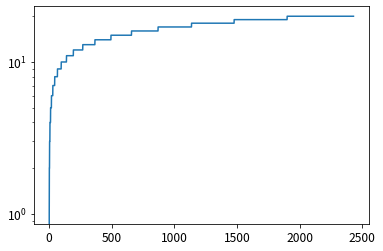

In [30]:
plt.plot(np.arange(0, adj.shape[0]), sum_matrix)
plt.yscale("log")
plt.show()

In [32]:
score2transitionable_num = foo(states10)

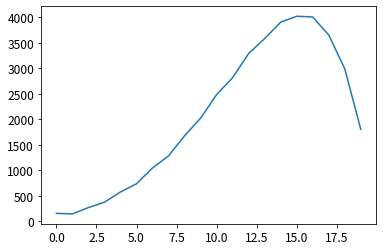

In [52]:
scores = np.fromiter(score2transitionable_num.keys(), dtype=int)
transitionable_nums = np.fromiter(score2transitionable_num.values(), dtype=int)
plt.plot(scores - scores[0], transitionable_nums)
# plt.yscale("log")
plt.show()